In [1]:
# Verify we have CUDA, if not do one or all of the following:
# 1. Change your runtime to GPU using Runtime => Change runtime type => GPU
# 2. Sometimes CUDA is just not here, if that happens reset the runtime using Runtime => Restart runtime

! lsb_release -a
! uname -m 
! nvcc --version
! nvidia-smi

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.5 LTS
Release:	18.04
Codename:	bionic
x86_64
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
Tue Dec 14 01:47:48 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
|

# Tensorflow Setup

In [2]:
# We need to uninstall the tensorflow that came with this session, as SciSharp.TensorFlow.Redist-Linux-GPU requires 2.3.1

# Uninstall the tensorflow version that came with this session
! pip uninstall --yes tensorflow

# Install tensorflow 2.3.1 (Do not restart the runtime if prompted)
! pip install tensorflow==2.3.1

# Install tensorflow-gpu 2.3.1 (Do not restart the runtime if prompted)
! pip install tensorflow-gpu==2.3.1

Found existing installation: tensorflow 2.7.0
Uninstalling tensorflow-2.7.0:
  Successfully uninstalled tensorflow-2.7.0
     |████████████████████████████████| 320.4 MB 24 kB/s 
     |████████████████████████████████| 459 kB 54.2 MB/s 
     |████████████████████████████████| 20.1 MB 53.2 MB/s 
     |████████████████████████████████| 2.9 MB 43.9 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0

     |████████████████████████████████| 320.4 MB 24 kB/s 


In [3]:
# Verify that the version of tensorflow we're expecting is installed. If 2.3.1 is not listed, you can now restart the runtime, as
# requested in the previous step.

# Colab should launch with tensorflow 2.X as the default, but we ensure its set as 2.X just in case
%tensorflow_version 2.x

# Display the version pip installed and its location
! pip show tensorflow

# Display the version pip installed, as well as GPUs that are available
import tensorflow as tf
print(tf.__version__)
print(tf.test.gpu_device_name())
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Name: tensorflow
Version: 2.3.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: tensorflow-estimator, gast, numpy, termcolor, keras-preprocessing, astunparse, protobuf, wrapt, tensorboard, opt-einsum, h5py, grpcio, absl-py, wheel, google-pasta, six
Required-by: kapre
2.3.1
/device:GPU:0
Num GPUs Available:  1


In [4]:
# Install the two additional packages required as per the SciSharp docs: https://github.com/SciSharp/TensorFlow.NET/tree/master/tensorflowlib

# libc6-dev should already be installed
#! sudo apt install libc6-dev 
! sudo apt install libgdiplus

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  libgdiplus
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 140 kB of archives.
After this operation, 445 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgdiplus amd64 4.2-2 [140 kB]
Fetched 140 kB in 1s (268 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libgdiplus.
(Reading database ... 155222 files and directories curr

In [5]:
# Lastly we pull down the 'libtensorflow' libraries required via the SciSharp docs: https://github.com/SciSharp/TensorFlow.NET/tree/master/tensorflowlib
# We used the Tensorflow docs located here for help: https://www.tensorflow.org/install/lang_c

# Pull the libtensorflow.so files
! wget -q https://storage.googleapis.com/tensorflow/libtensorflow/libtensorflow-gpu-linux-x86_64-2.3.1.tar.gz

# Install the files where they are expected
! sudo tar -C /usr/local -xzf libtensorflow-gpu-linux-x86_64-2.3.1.tar.gz

# Run 'ldconfig' to configure the linker
! sudo ldconfig

# Set the appropriate environment variables and paths so the libtensorflow libraries can be found
%env LIBRARY_PATH=$LIBRARY_PATH:/usr/local
%env LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/usr/local

/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link

env: LIBRARY_PATH=$LIBRARY_PATH:/usr/local
env: LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/usr/local


# Install .NET 3.1 & 6.0 and ML.NET

In [6]:
# Install .NET Core 3.1 & 6.0 & ML.NET
! wget -q https://packages.microsoft.com/config/ubuntu/18.04/packages-microsoft-prod.deb -O packages-microsoft-prod.deb \
&& dpkg -i packages-microsoft-prod.deb \
&& add-apt-repository universe \
&& apt-get update \
&& apt-get install apt-transport-https \
&& apt-get update \
&& apt-get install dotnet-sdk-3.1 \
&& apt-get install dotnet-sdk-6.0 \
&& dotnet tool install -g mlnet

Selecting previously unselected package packages-microsoft-prod.
(Reading database ... 155229 files and directories currently installed.)
Preparing to unpack packages-microsoft-prod.deb ...
Unpacking packages-microsoft-prod (1.0-ubuntu18.04.2) ...
Setting up packages-microsoft-prod (1.0-ubuntu18.04.2) ...
'universe' distribution component is already enabled for all sources.
Get:1 https://packages.microsoft.com/ubuntu/18.04/prod bionic InRelease [4,003 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 https://developer.download.nvidia.c

# Staging Our Data

In [7]:
# Mount our Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Unzip the transformed images
! unzip -qq /content/drive/MyDrive/Catovera/fashion-product-images-dataset/transformed_images.zip -d unzipped_images

In [34]:
# Verify the training data came over, in this case >= 178139 images
! ls unzipped_images/unzipped_images/Images/ | wc -l

178140


In [ ]:
# in order to upload a CSV we need to upload via files.upload to avoid Drive converting the file
#from google.colab import files
#uploaded = files.upload()

# copy the traning csv into the images folder
#! cp -a all_data.csv unzipped_images/unzipped_images/Images/

cp: cannot stat 'all_data.csv': No such file or directory


In [33]:
! cp -a /content/drive/MyDrive/Catovera/ml-color-model/all_data_select.csv unzipped_images/unzipped_images/Images/

# renaming the file here until the code is updated to have that passed in
! mv unzipped_images/unzipped_images/Images/all_data_select.csv unzipped_images/unzipped_images/Images/training_data.csv

# Stage Our Code

In [12]:
# Make a "build-ouput" directory to hold compiled training code
! mkdir build-output

In [49]:
# repeatable remove folder, then copy it back in, modify permissions so we can run it
! rm -rf build-output/ColabOutput
! cp -a /content/drive/MyDrive/Catovera/ml-color-model/ColabOutput/ build-output/
! chmod -R 777 build-output/ColabOutput/

cp: cannot open '/content/drive/MyDrive/Catovera/ml-color-model/ColabOutput/Data/LocalImages/training_data.gsheet' for reading: Operation not supported


In [50]:
# verify the files are copied over, should be 3 files/folders: App  App.pdb  Data
! ls build-output/ColabOutput/

App  App.pdb  Data


# Transform the Images

In [ ]:
# create all the duplicate images for training
! ./build-output/ColabOutput/App image "unzipped_images/Images"

In [16]:
import pandas as pd
from sklearn.utils import shuffle
import os.path

In [61]:
# Load the styles.csv, which has all the image file names and color labels
df_styles = pd.read_csv('unzipped_images/unzipped_images/Images/training_data.csv')
df_styles.head

<bound method NDFrame.head of                    ImagePath  Label
0              2129_flip.jpg  Green
1                  36719.jpg  Black
2       19327_rotate_180.jpg   Navy
3       18521_rotate_180.jpg  Black
4       27036_rotate_180.jpg  Green
...                      ...    ...
113838  32558_rotate_180.jpg   Blue
113839        57039_flip.jpg  Black
113840  52523_rotate_180.jpg   Blue
113841             52129.jpg  White
113842             14661.jpg   Navy

[113843 rows x 2 columns]>

In [65]:
# remove any rows where the image does not exist
for index, row in df_styles.iterrows():
    file_exists = os.path.exists("unzipped_images/unzipped_images/Images/" + str(row['ImagePath']))
    if file_exists == False:
        print(row['ImagePath'])
        df_styles.drop(index, inplace=True)
        #df_styles.drop(df_styles.index[index], inplace=True)

df_styles.shape

39425_rotate_180.jpg
39403.jpg
39401_rotate_180.jpg
39425_rotate_90.jpg
39425.jpg
39401_flip.jpg
12347_flip.jpg
39410_flip.jpg
39425_flip.jpg
39410_rotate_90.jpg
39403_rotate_180.jpg
39410.jpg
12347_rotate_180.jpg


(113816, 2)

In [66]:
# save the complete list of images
! rm -rf unzipped_images/unzipped_images/Images/training_data.csv
df_styles.to_csv("unzipped_images/unzipped_images/Images/training_data.csv", index=False)
#df_styles.to_csv("training_data.csv", index=False)
#! mv training_data.csv unzipped_images/unzipped_images/Images/training_data.csv

In [ ]:
# find a specific file
# ! find ./unzipped_images/images -iname '*38039*' #-exec rm -f {} \;

# display to ensure transformations took place properly
from IPython.display import Image, display
display(Image('./unzipped_images/unzipped_images/Images/39569.jpg'))

# Train and Save Model

In [67]:
# train the model
! ./build-output/ColabOutput/App --train --folder="unzipped_images/unzipped_images/Images"

Streaming output truncated to the last 5000 lines.
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 86442
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 86443
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 86444
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 86445
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 86446
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 86447
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 86448
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 86449
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 86450
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 86451
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 86452
Phase: Bottleneck Computation, Dataset used:      Train, Image Index: 86453
Phase: Bottleneck Computation, Datase

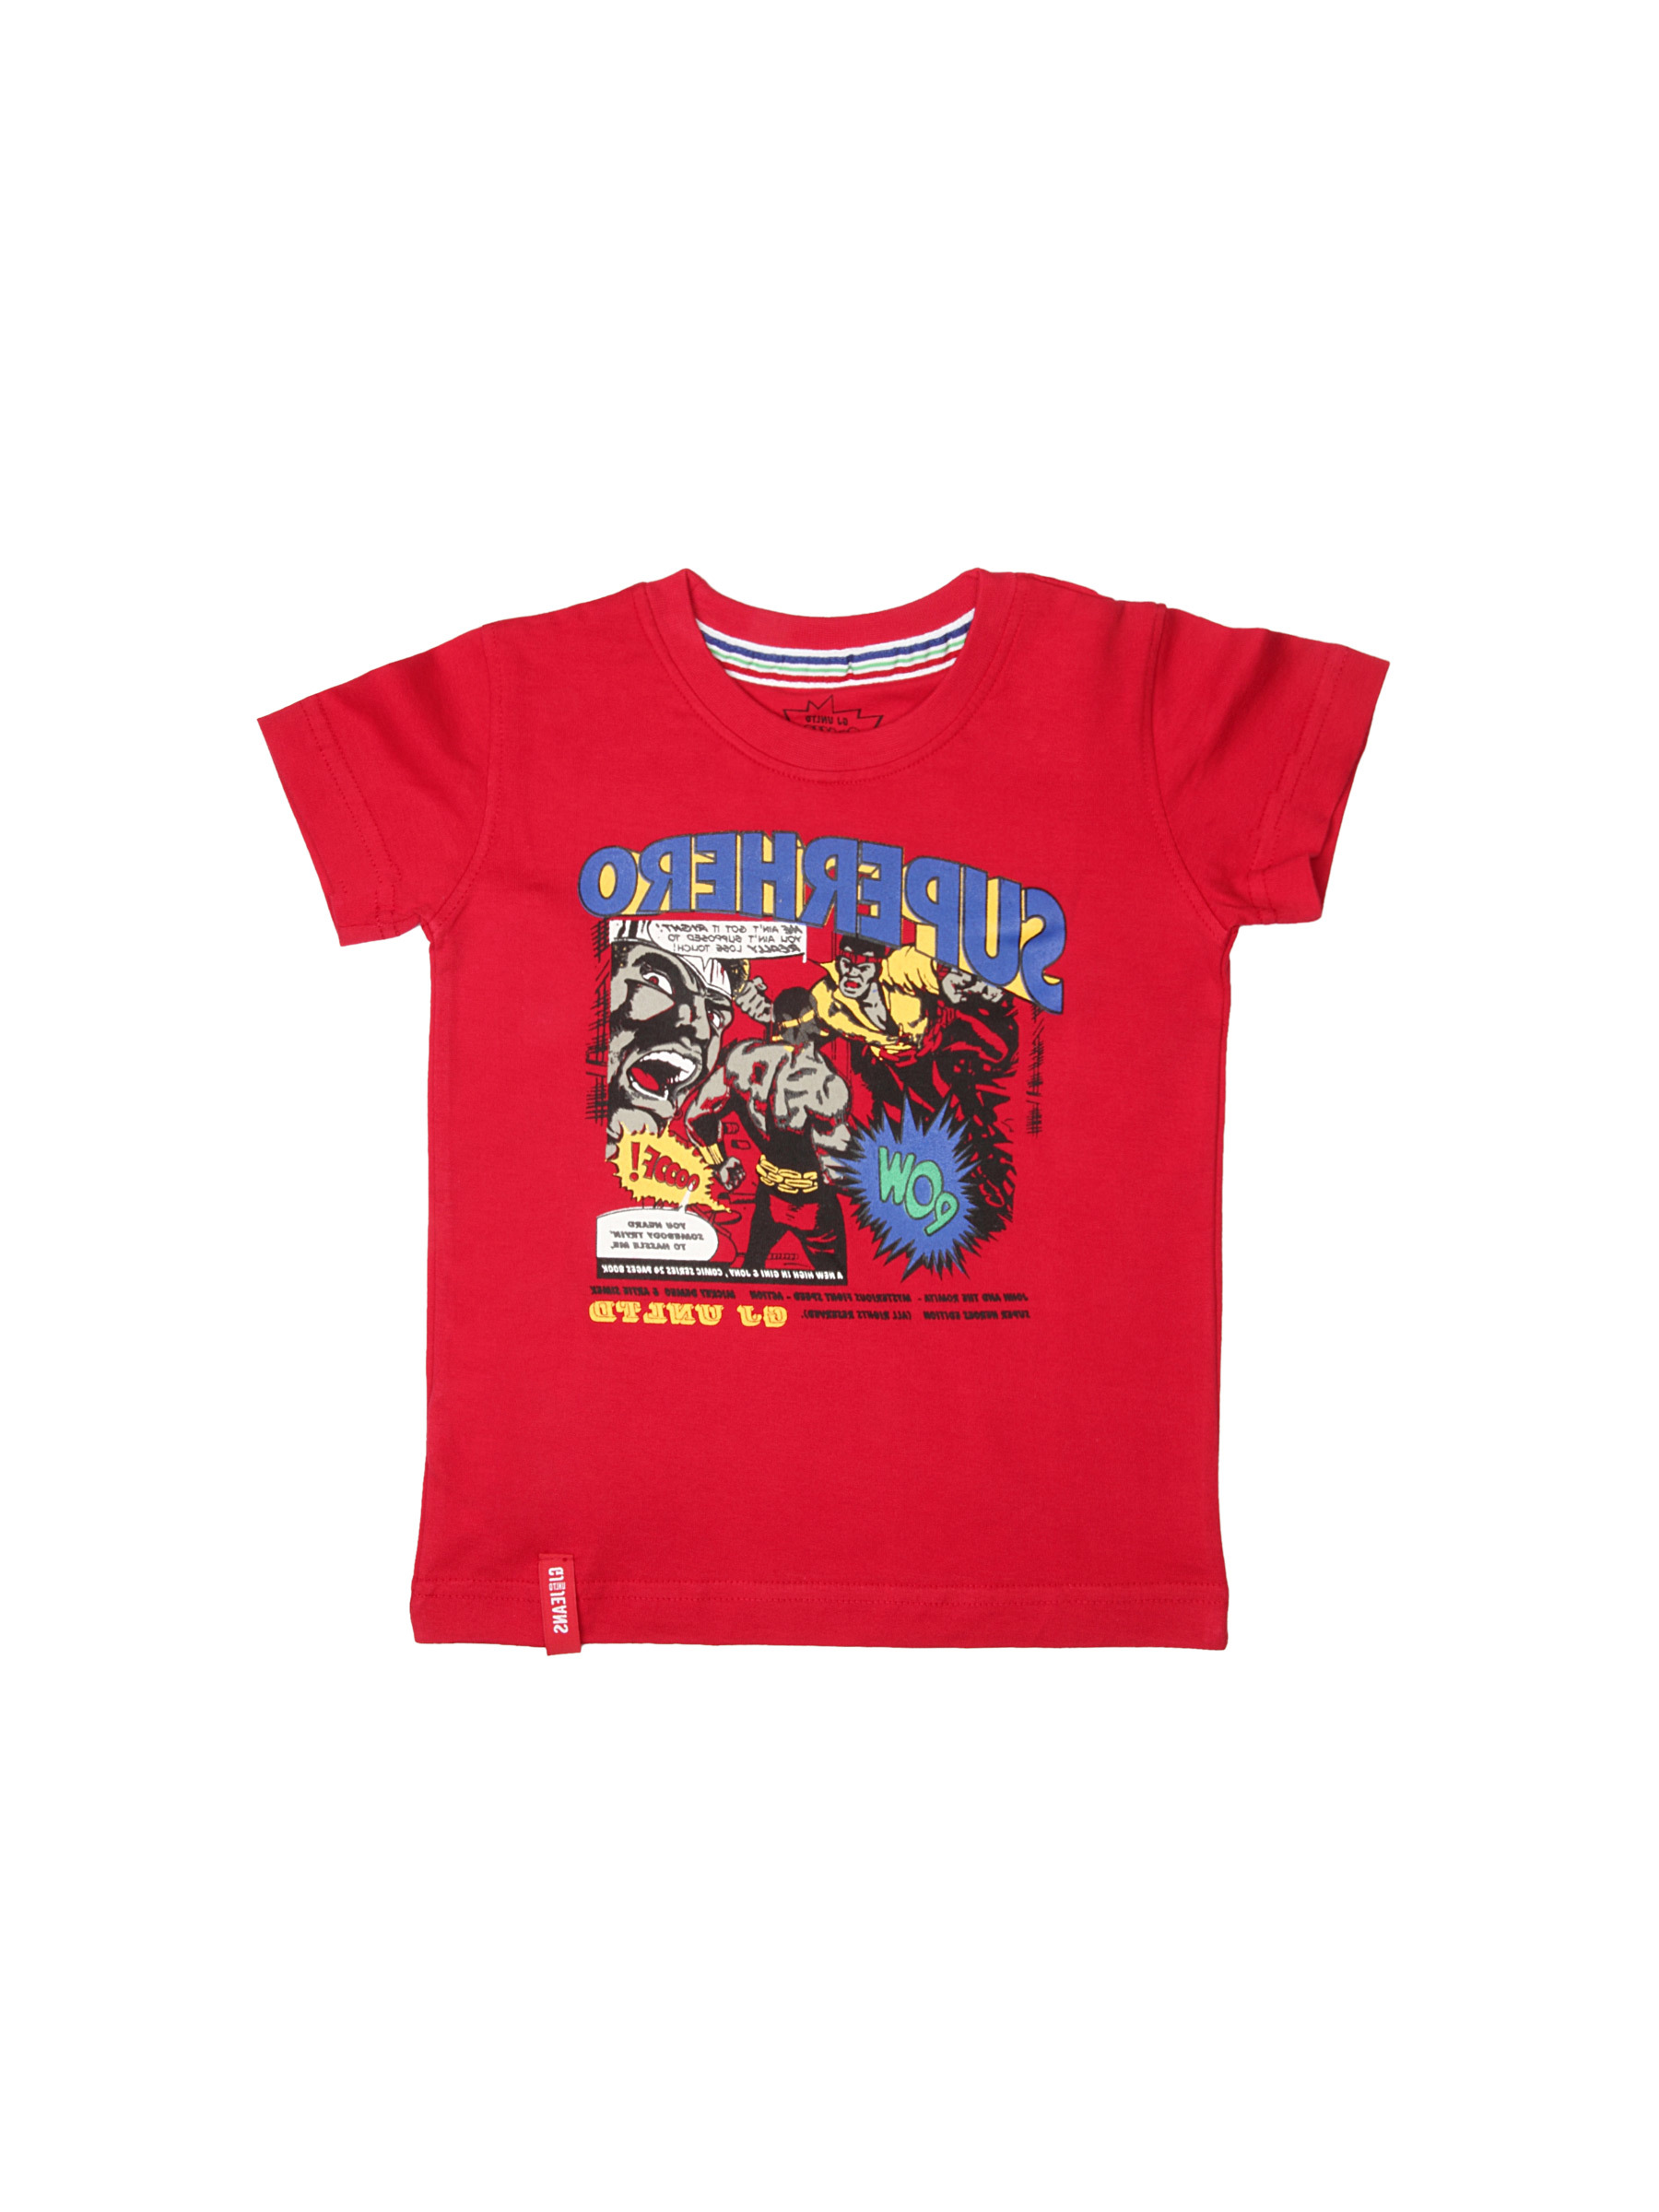

In [75]:
# display to ensure transformations took place properly
from IPython.display import Image, display
display(Image('./unzipped_images/unzipped_images/Images/38985_flip.jpg'))

In [70]:
# move the final model out to the ml-color-model folder
! cp -a build-output/ColabOutput/color-classifier.mdl /content/drive/MyDrive/Catovera/ml-color-model/12-13-21-22-53-00-color-classifier.mdl

In [71]:
! ls /content/drive/MyDrive/Catovera/ml-color-model/

12-13-21-22-53-00-color-classifier.mdl	ColabOutput
12-9-21-4-23-00-color-classifier.mdl	color-classifier.mdl
12-9-21color-classifier.mdl		data-prep-ml-color-model.ipynb
all_data.csv				training-ml-color-model.ipynb
all_data_select.csv
